# FordA data Visualization
- get tsv file from google drive(alraedy get by get_data_from_web.ipynb)
- time series data
- columns: label, sensor data 1 ~ 500
    - no column name 
        -> add column name in this code
    - 1: normal -> change to 0 (for generalization)
    - -1: failure -> change to 1
- row: 3600 for train data

## mount to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd drive/My\ Drive/Colab\ Notebooks/summer_coop/FordA

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/summer_coop/FordA'
/content/drive/My Drive/Colab Notebooks/summer_coop/FordA


## naming the column
- since in data, there is no column name, add column name manually
- total 501 columns: class, sensor1 ... sensor500

In [ ]:
column_name = []
column_name.append('failure')
for i in range(1, 501):
    name = 'sensor' + str(i)
    column_name.append(name)
print(column_name[-1:])

['sensor500']


## Get data and check data

In [ ]:
import pandas as pd
# get tsv file
data = pd.read_csv('FordA_TRAIN.tsv', delimiter = '\t', header = None) 
test_data = pd.read_csv('FordA_TEST.tsv', delimiter = '\t', header = None)

In [ ]:
data.columns = column_name  # assign column name
data_full = data.to_numpy() 
test_full = test_data.to_numpy()

In [ ]:
data.head()

,failure,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,...,sensor461,sensor462,sensor463,sensor464,sensor465,sensor466,sensor467,sensor468,sensor469,sensor470,sensor471,sensor472,sensor473,sensor474,sensor475,sensor476,sensor477,sensor478,sensor479,sensor480,sensor481,sensor482,sensor483,sensor484,sensor485,sensor486,sensor487,sensor488,sensor489,sensor490,sensor491,sensor492,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,sensor500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,1.640809,1.552290,1.437952,1.279354,1.069119,0.744547,0.277605,-0.300724,-0.937328,-1.520083,-1.951617,-2.136033,-2.040136,-1.722941,-1.261900,-0.804548,-0.461534,-0.278225,-0.251300,-0.301830,-0.313264,-0.204458,0.067002,0.471611,0.932651,1.353120,1.644498,1.758836,1.696134,1.482211,...,1.297795,1.290419,1.135509,0.840443,0.453170,0.031299,-0.366744,-0.704964,-0.963146,-1.166004,-1.320913,-1.457381,-1.571719,-1.623356,-1.571719,-1.402057,-1.099614,-0.708652,-0.287077,0.103517,0.438416,0.689222,0.895768,1.113379,1.342055,1.570731,1.762524,1.839979,1.744082,1.489588,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,-1.619951,-1.545709,-1.367893,-1.119998,-0.828548,-0.506228,-0.162588,0.185410,0.523795,0.822743,1.062119,1.212658,1.241355,1.155590,0.978726,0.751291,0.518479,0.326827,0.207952,0.170809,0.188096,0.237036,0.285012,0.296589,0.250279,0.131545,-0.054224,-0.281435,-0.524193,-0.764913,...,0.848206,0.926682,0.966194,0.965209,0.925171,0.851871,0.750836,0.635263,0.495169,0.327521,0.132563,-0.093737,-0.351475,-0.623371,-0.886077,-1.117509,-1.288357,-1.369218,-1.323061,-1.150471,-0.861634,-0.479214,-0.034418,0.409945,0.795128,1.071377,1.210040,1.189128,1.016435,0.727256,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,-2.550600,-2.409010,-2.179321,-1.883556,-1.543741,-1.178754,-0.816914,-0.464514,-0.121238,0.202845,0.510881,0.787767,1.030043,1.218829,1.350979,1.410761,1.401322,1.328954,1.212536,1.074093,0.954528,0.869575,0.825525,0.825525,0.838110,0.819232,0.753157,0.617860,0.435367,0.237456,...,0.633592,0.797207,0.938796,1.020603,0.989139,0.834964,0.567517,0.245951,-0.076558,-0.341803,-0.521149,-0.624982,-0.681618,-0.725668,-0.779157,-0.845232,-0.895575,-0.892429,-0.823207,-0.681618,-0.483392,-0.257478,-0.040374,0.134882,0.226129,0.254761,0.259481,0.260740,0.281821,0.332164,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,-1.506933,-1.246560,-0.852660,-0.358617,0.165802,0.659512,1.073440,1.363857,1.524087,1.564144,1.504058,1.353842,1.120173,0.816404,0.482591,0.138764,-0.184367,-0.458761,-0.642358,-0.735826,-0.745840,-0.719135,-0.679078,-0.645696,-0.622330,-0.572258,-0.475452,-0.328574,-0.138635,0.043794,...,-0.254134,-0.538876,-0.805927,-1.036258,-1.199826,-1.289955,-1.276603,-1.153092,-0.929437,-0.605639,-0.218750,0.165802,0.515972,0.796375,0.989986,1.106821,1.156893,1.170245,1.160231,1.123511,1.056749,0.929900,0.729612,0.442533,0.101043,-0.245455,-0.558905,-0.795912,-0.926099,-0.962819,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,1.466467,1.250755,1.056614,0.888359,0.684510,0.339371,-0.201420,-0.888032,-1.607432,-2.200641,-2.481067,-2.351639,-1.823144

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601 entries, 0 to 3600
Columns: 501 entries, failure to sensor500
dtypes: float64(500), int64(1)
memory usage: 13.8 MB


In [ ]:
data.describe()

,failure,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,...,sensor461,sensor462,sensor463,sensor464,sensor465,sensor466,sensor467,sensor468,sensor469,sensor470,sensor471,sensor472,sensor473,sensor474,sensor475,sensor476,sensor477,sensor478,sensor479,sensor480,sensor481,sensor482,sensor483,sensor484,sensor485,sensor486,sensor487,sensor488,sensor489,sensor490,sensor491,sensor492,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,sensor500
count,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,...,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000,3601.000000
mean,-0.025271,-0.016708,-0.015270,-0.013605,-0.011943,-0.009966,-0.007062,-0.003495,0.000568,0.005354,0.010032,0.014319,0.017683,0.019282,0.019283,0.017646,0.015322,0.012678,0.010566,0.008922,0.007632,0.006550,0.004940,0.002265,-0.001950,-0.007549,-0.013773,-0.019744,-0.024407,-0.026658,-0.026020,-0.022386,-0.016733,-0.010365,-0.003874,0.002197,0.007214,0.010728,0.013467,0.015678,...,0.025695,0.030041,0.029071,0.023088,0.013409,0.002010,-0.009202,-0.018040,-0.023417,-0.024940,-0.023154,-0.019098,-0.013750,-0.008060,-0.003199,0.000528,0.003098,0.004597,0.005320,0.005271,0.004390,0.003120,0.001944,0.001276,0.001486,0.002823,0.004981,0.007044,0.008660,0.009285,0.008724,0.006895,0.004053,0.000929,-0.001922,-0.003369,-0.003237,-0.001820,0.000031,0.001395
std,0.999819,1.058455,1.051904,1.044560,1.042573,1.046933,1.052829,1.055439,1.054305,1.050424,1.044120,1.035018,1.026105,1.023283,1.030380,1.043375,1.054895,1.059700,1.057929,1.051888,1.043713,1.035193,1.028912,1.027167,1.030089,1.034483,1.037202,1.037264,1.034693,1.030477,1.024569,1.018252,1.012931,1.008544,1.005842,1.005726,1.008703,1.014241,1.020776,1.025479,...,1.020337,1.022314,1.020849,1.017677,1.014047,1.010903,1.007781,1.003997,0.999897,0.996639,0.994816,0.995926,1.000012,1.004827,1.007889,1.008171,1.008808,1.013614,1.022958,1.031245,1.032113,1.023587,1.010363,1.001946,1.004094,1.014122,1.025180,1.031944,1.034300,1.035320,1.037718,1.040632,1.040826,1.036657,1.028358,1.018719,1.011871,1.012367,1.020914,1.032490
min,-1.000000,-3.933454,-3.656912,-3.479467,-3.595350,-3.773891,-3.914729,-3.855301,-4.497360,-4.552591,-4.000282,-4.119295,-3.855799,-3.244858,-3.404014,-3.521625,-3.806707,-4.020803,-3.861801,-3.717866,-3.444758,-3.817300,-3.819272,-3.416308,-3.656892,-4.031496,-4.011296,-3.584429,-3.923788,-4.493159,-4.617693,-4.306665,-3.806682,-3.813283,-3.520799,-3.271331,-3.478838,-3.674570,-3.518555,-3.567711,...,-3.171938,-3.330722,-3.957914,-4.271510,-4.158267,-3.740493,-3.486802,-3.191678,-3.345373,-3.384421,-3.752627,-3.962461,-3.716134,-3.764158,-3.556943,-3.989691,-4.182075,-4.021755,-3.524762,-3.651086,-3.609878,-3.393170,-3.301967,-3.371643,-3.289448,-3.502782,-3.584812,-3.673399,-4.190544,-4.449116,-4.402103,-4.073011,-4.014450,-3.817036,-3.574256,-3.746353,-3.680805,-3.90456

### check is there any NUll data
- no NULL data, all columns have 3601 rows

In [ ]:
info = data.describe()
print(info.loc['count', :].min(), info.loc['count', :].max())

3601.0 3601.0


In [ ]:
data.shape

(3601, 501)

## Split features and class

In [ ]:
train_target = data_full[:, 0]
train_input = data_full[:, 1:]
test_target = test_full[:, 0]
test_input = test_full[:, 1:]

In [ ]:
print(train_target)
print(train_input)

[-1.  1. -1. ... -1.  1. -1.]
[[-0.79717168 -0.66439208 -0.37301463 ... -0.66439208 -1.0737958
  -1.5643427 ]
 [ 0.80485472  0.63462859  0.37347448 ... -0.71488505 -0.56044294
  -0.31908642]
 [ 0.7279851   0.11128392 -0.49912439 ...  0.39446303  0.33940042
   0.25539062]
 ...
 [-0.57005428 -0.33316523 -0.29351853 ... -1.3937145  -0.94273327
  -0.27072168]
 [ 2.0067321   2.0791499   2.0220362  ... -0.43214504 -0.44123126
  -0.28070891]
 [-0.12524091 -0.32536268 -0.48823697 ...  0.55576053  0.57445102
   0.57311598]]


### change class's value for generalization
- normal: 1 -> 0
- failure: -1 -> 1


In [ ]:
train_target [train_target == 1] = 0
train_target[train_target == -1] = 1
print(train_target)

[1. 0. 1. ... 1. 0. 1.]


In [ ]:
test_target[test_target == 1] = 0
test_target[test_target == -1] = 1

In [ ]:
data_full[:100, 0]

array([1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.])

In [ ]:
test_full[:100]

array([[ 1.        , -0.14040239,  0.17164128, ..., -0.69040244,
        -0.97659635, -0.79426313],
       [ 1.        ,  0.33403756,  0.32225332, ..., -1.0417721 ,
        -1.1596145 , -1.3756589 ],
       [ 1.        ,  0.71668608,  0.74436655, ..., -3.6752806 ,
        -4.1366217 , -4.3396117 ],
       ...,
       [ 1.        , -0.20704541, -0.10173474, ..., -0.27556078,
        -0.01196691,  0.30047589],
       [ 1.        ,  0.13708431, -0.01049451, ...,  0.08219756,
        -0.47498608, -0.9731249 ],
       [ 1.        ,  0.56416743,  0.62006168, ..., -0.39050637,
        -0.08532376,  0.08302972]])

In [ ]:
print("No. of failure: \t" + str(train_target.sum()))

No. of failure: 	1846.0


In [ ]:
import numpy as np
np.save('FordA_modified.npy', data_full)
np.save('FordA_test_modified.npy', test_full)

## Check correlation between columns

In [ ]:
corelation = data.corr()

In [ ]:
corelation.head()

,failure,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,sensor27,sensor28,sensor29,sensor30,sensor31,sensor32,sensor33,sensor34,sensor35,sensor36,sensor37,sensor38,sensor39,...,sensor461,sensor462,sensor463,sensor464,sensor465,sensor466,sensor467,sensor468,sensor469,sensor470,sensor471,sensor472,sensor473,sensor474,sensor475,sensor476,sensor477,sensor478,sensor479,sensor480,sensor481,sensor482,sensor483,sensor484,sensor485,sensor486,sensor487,sensor488,sensor489,sensor490,sensor491,sensor492,sensor493,sensor494,sensor495,sensor496,sensor497,sensor498,sensor499,sensor500
failure,1.000000,-0.001757,0.000238,0.002701,0.004684,0.005346,0.004301,0.002732,0.001949,0.002483,0.005209,0.009207,0.013569,0.016455,0.015868,0.011681,0.004511,-0.003930,-0.012194,-0.018061,-0.020439,-0.019415,-0.015346,-0.009373,-0.002916,0.003064,0.008238,0.012373,0.015507,0.017482,0.017919,0.016210,0.012112,0.005993,-0.001473,-0.009037,-0.015296,-0.018946,-0.020200,-0.019317,...,0.051789,0.050375,0.044951,0.035815,0.023829,0.010514,-0.002950,-0.015730,-0.026780,-0.035682,-0.042066,-0.045462,-0.045961,-0.043726,-0.038330,-0.030024,-0.019567,-0.007286,0.005259,0.016648,0.025816,0.032281,0.035036,0.033037,0.026888,0.017854,0.007695,-0.001577,-0.008596,-0.011970,-0.011715,-0.007962,-0.002028,0.004101,0.009004,0.011094,0.009432,0.004506,-0.002224,-0.008980
sensor1,-0.001757,1.000000,0.955441,0.824725,0.624149,0.384718,0.141105,-0.081436,-0.269796,-0.419172,-0.531380,-0.610612,-0.658672,-0.671986,-0.647539,-0.587974,-0.500389,-0.391605,-0.268308,-0.137977,-0.008801,0.111709,0.217655,0.304983,0.372825,0.422357,0.453936,0.466983,0.458924,0.427498,0.371956,0.293250,0.195569,0.085096,-0.030194,-0.141751,-0.241146,-0.321692,-0.378781,-0.410002,...,0.003237,-0.001002,-0.006165,-0.010546,-0.012890,-0.012314,-0.009189,-0.004535,0.000075,0.003241,0.004237,0.002871,0.000489,-0.001844,-0.003099,-0.002238,0.000595,0.004693,0.009027,0.011937,0.013097,0.012419,0.010209,0.007042,0.003873,0.001413,-0.000156,-0.001573,-0.003618,-0.006802,-0.011001,-0.015618,-0.019913,-0.023282,-0.024699,-0.023207,-0.018717,-0.011458,-0.002540,0.006706
sensor2,0.000238,0.955441,1.000000,0.953253,0.817840,0.615756,0.380432,0.142303,-0.077788,-0.266956,-0.420095,-0.537573,-0.620541,-0.666650,-0.673858,-0.644608,-0.584968,-0.499913,-0.393726,-0.271687,-0.141363,-0.011453,0.109657,0.215211,0.301927,0.369902,0.419775,0.452188,0.465583,0.457675,0.426316,0.370096,0.290516,0.191698,0.080362,-0.035117,-0.145154,-0.241909,-0.319286,-0.373803,...,0.003234,0.000586,-0.002771,-0.005500,-0.006757,-0.005870,-0.003397,-0.000410,0.001712,0.001974,0.000030,-0.003883,-0.008081,-0.011328,-0.012807,-0.011824,-0.008696,-0.004276,0.000284,0.003528,0.005416,0.006075,0.006024,0.005586,0.005248,0.005033,0.004910,0.003939,0.001467,-0.002450,-0.007372,-0.012603,-0.017161,-0.020554,-0.022192,-0.021397,-0.018186,-0.012603,-0.005416,0.002471
sensor3,0.002701,0.824725,0.953253,1.000000,0.951913,0.816276,0.618187,0.387548,0.150078,-0.073239,-0.267894,-0.426884,-0.547676,-0.627862,-0.666816,-0.668530,-0.639824,-0.584884,-0.505310,-0.402685,-0.281695,-0.150160,-0.017853,0.105525,0.212666,0.300588,0.368814,0.418833,0.450858,0.464022,0.456351,0.425174,0.369296,0.289973,0.191281,0.080030,-0.034022,-0.142205,-0.236771,-0.312765,...,0.003300,0.002330,0.000876,-0.000134,-0.000189,0.001095,0.002927,0.004164,0.003582,0.000644,-0.004556,-0.011205,-0.017236,-0.021188,-0.022443,-0.020715,-0.016619,-0.011365,-0.006437,-0.003068,-0.001020,0.000149,0.001274,0.002633,0.004418,0.006101,0.007367,0.007118,0.004766,0.000831,-0.003996,-0.008995,-0.013026,-0.015697,-0.016976,-0.016548,-0.014561,-0.010909,-0.006001,-0.000217
sensor4,0.004684,0.624149,0.817840,0.951913,1.000000,0.952416,0.820269,0.626396,0.396051,0.155091,-0.073066,-0.272172,-0.433015,-0.550414,-0.623391,-0.6573

In [ ]:
corelation.loc[:, ['failure']]

,failure
failure,1.000000
sensor1,-0.001757
sensor2,0.000238
sensor3,0.002701
sensor4,0.004684
...,...
sensor496,0.011094
sensor497,0.009432
sensor498,0.004506
sensor499,-0.002224


### Visualize correlation between failture and sensors
- some sensors have high correlation with failure
- can be helpful using the data for machine learning

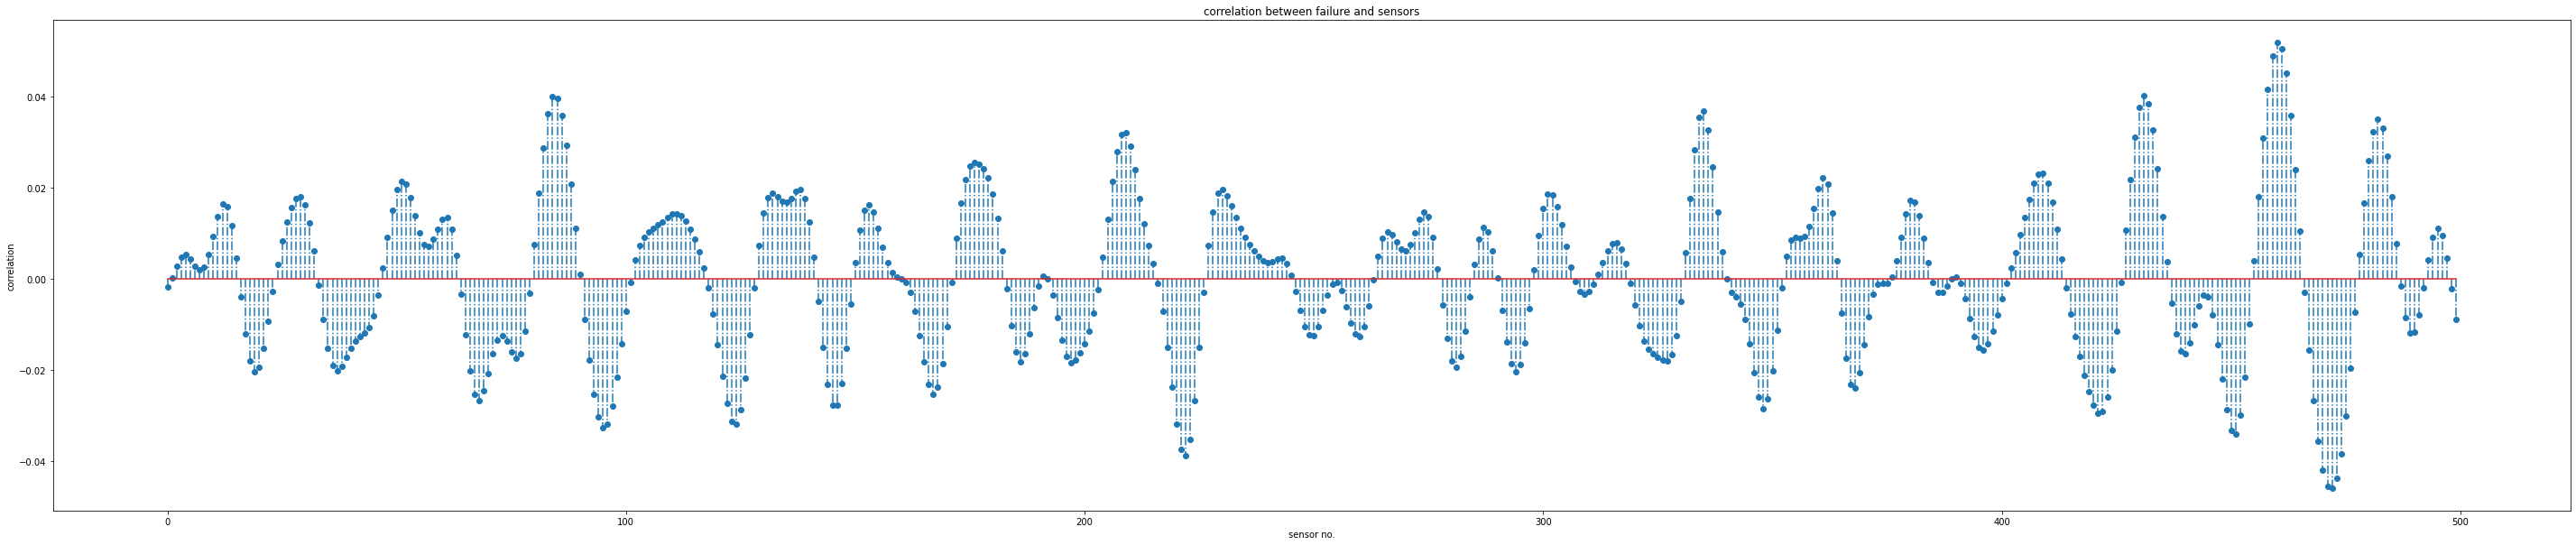

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (50, 10))
plt.stem(range(500),corelation.loc['sensor1':, 'failure'], '-.', use_line_collection= True)
plt.xlabel('sensor no.')
plt.ylabel('correlation')
plt.title('correlation between failure and sensors')
plt.savefig('FordA_Correlation_bw_failure_sensors.png')
plt.show()